# Evaluating Environmental Predictors of Breeding Waterfowl Populations in the Central Interior Plateau of British Columbia 

## Adventures in machine-learning and regression-based population models
![image](overview_survey_area_extent.png)


### Overview - General Steps
1. Question - What is the distribution of species within the Central Interior Plateau? 
    * Identify main drivers
    * Identify areas of interest - diversity and abundance
    * Inform conservation planning
2. Data exploration and data wrangling
3. Identify analysis methods and tools
4. Perform analysis
5. Examine and refine


<a href="https://community.esri.com/groups/esri-training/blog/2018/10/19/use-the-five-step-gis-analysis-process"> <font size = -2>Modified from ESRI 5-Step GIS Analysis Process</font></a>


<style type="text/css">
.input_hidden{
    display: none
</style>

<style type="text/css"> # CSS hack to hide the cell input
.input_hidden{
    display: none


Issues tracking:

1. IRKernel loading packages from later version of R (3.5.3 instead of 3.5.1) - must change kernel spec as described here: https://github.com/IRkernel/IRkernel/issues/183


2. jupyterlab extension to close cells * requires installation of nodejs and npm 
    conda install nodejs
    conda install npm 
   
    - required update of pip
    - which required adding forge channel first:
        conda config --add channels conda-forge 
        conda update pip
     now
        conda install nodejs
        conda install npm
     but required update of core-js with 
         npm install --save core-js@^3
     
     then follow: https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/install.html and run
         conda install -c conda-forge jupyter_contrib_nbextensions
     then 
         jupyter contrib nbextension install --sys-prefix # for system wide esp. useful in virtual env
     then enable the path but first list available Jupyter paths 
         jupyter --paths

     Check jupyterlab extensions with 
        jupyter nbextension list
    
    }
</style>


In [29]:
# Housekeeping - manage packages 
version
Packages <- c("dplyr", "stringr", "ggplot2", "gganimate", "RColorBrewer", "reshape2", "gridExtra", "tidyverse",
             "repr", "knitr")
# # Install packages if not installed 
# if (!require("pacman")) install.packages("pacman")
#     pacman::p_load(Packages)

lapply(Packages, require, character.only=TRUE)
(.packages)() # List loaded packages

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          3                           
minor          5.1                         
year           2018                        
month          07                          
day            02                          
svn rev        74947                       
language       R                           
version.string R version 3.5.1 (2018-07-02)
nickname       Feather Spray               

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

Here is a look at the survey data--the head and tail views of the data frame.

In [31]:
setwd("C:/Users/hashimotoy/Documents/MGIS/Documentation/Reports/Jupyter")
df <- read.csv("iws_pts_filtered_20190620.csv" )

head(df)
tail(df)
nrow(df)

date_,year_,month_,day_,lon,lat,species,x_alb,y_alb,sp_name,...,eco,trans_id,Ecosection_2pt1,prev_trans,Ecosection_1995,unknown_BoN_combo,Total_Count,Total_IBP_Formula,Total_Count_Formula,pop
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,...,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>
39209,2007,5,7,-122.8230,53.30426,CAGO,1211186,926711.1,Canada Goose,...,QUL,16,Quesnel Lowland,B07,Quesnel Lowland,1,1,2* [pair]+ [unknownSex],Total_IBP+ [mixed_m] + [mixed_f],1
39211,2007,5,9,-122.6088,53.01350,AMWI,1226964,894968.8,American Wigeon,...,QUL,14,Quesnel Lowland,B09,Quesnel Lowland,0,9,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],6
39211,2007,5,9,-122.6088,53.01350,CAGO,1226964,894968.8,Canada Goose,...,QUL,14,Quesnel Lowland,B09,Quesnel Lowland,1,1,2* [pair]+ [unknownSex],Total_IBP+ [mixed_m] + [mixed_f],1
39211,2007,5,9,-122.6088,53.01350,GWTE,1226964,894968.8,Green-winged Teal,...,QUL,14,Quesnel Lowland,B09,Quesnel Lowland,0,4,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],4
39211,2007,5,9,-122.6088,53.01350,MALL,1226964,894968.8,Mallard,...,QUL,14,Quesnel Lowland,B09,Quesnel Lowland,0,6,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],0
39223,2007,5,21,-124.4701,54.31847,GWTE,1099279,1036228.4,Green-winged Teal,...,BAU,23,Babine Upland,A10,Babine Upland,0,2,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],2


,date_,year_,month_,day_,lon,lat,species,x_alb,y_alb,sp_name,...,eco,trans_id,Ecosection_2pt1,prev_trans,Ecosection_1995,unknown_BoN_combo,Total_Count,Total_IBP_Formula,Total_Count_Formula,pop
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,...,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>
32848,42866,2017,5,11,-124.3120,52.14455,GWTE,NA,NA,Green-Winged Teal,...,CHP,8,Chilcotin Plateau,C05,Chilcotin Plateau,0,2,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],2
32849,42866,2017,5,11,-124.3104,52.14597,RNDU,NA,NA,Ring-necked Duck,...,CHP,8,Chilcotin Plateau,C05,Chilcotin Plateau,0,1,1 * [lone_m] +2* [pair] + [m2]*2 + [m3]*3 + [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],1
32850,42866,2017,5,11,-124.3804,52.14530,NOSL,NA,NA,Northern Shoveler,...,CHP,8,Chilcotin Plateau,C05,Chilcotin Plateau,0,2,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],2
32851,42866,2017,5,11,-124.3804,52.14530,MALL,NA,NA,Mallard,...,CHP,8,Chilcotin Plateau,C05,Chilcotin Plateau,0,2,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],2
32852,42866,2017,5,11,-124.3793,52.14648,GWTE,NA,NA,Green-Winged Teal,...,CHP,8,Chilcotin Plateau,C05,Chilcotin Plateau,0,2,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],2
32853,42866,2017,5,11,-124.3977,52.14375,MALL,NA,NA,Mallard,...,CHP,8,Chilcotin Plateau,C05,Chilcotin Plateau,0,2,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],2


[1] 32853

### Data Exploration - Species Observation Records

In [32]:
n_sp <- unique(df$sp_id)

sp <- df %>%
    group_by(sp_id) %>%
    summarise(Population = sum(pop))

sp_top_5 <- sp %>%
    arrange(desc(Population))%>%
    top_n(5)

sp_bot_5 <- sp %>%
    arrange(Population)%>%
    top_n(-5)

sp_top_10 <- sp %>%
    arrange(desc(Population))%>%
    top_n(10)

print(paste("Total distinct species of waterfowl : ",length(n_sp)))
writeLines("\n5 MOST common species:")
sp_top_5
writeLines("\n5 LEAST common species:") 
sp_bot_5   



Selecting by Population
Selecting by Population
Selecting by Population


[1] "Total distinct species of waterfowl :  31"

5 MOST common species:


sp_id,Population
<fct>,<int>
MALL,18902
RNDU,11079
BUFF,9672
CAGO,9578
GWTE,7608



5 LEAST common species:


sp_id,Population
<fct>,<int>
BLSC,2
EUWI,2
SWAN,2
HADU,6
SNGO,16


What are the top 15 most common species? 

Selecting by Population


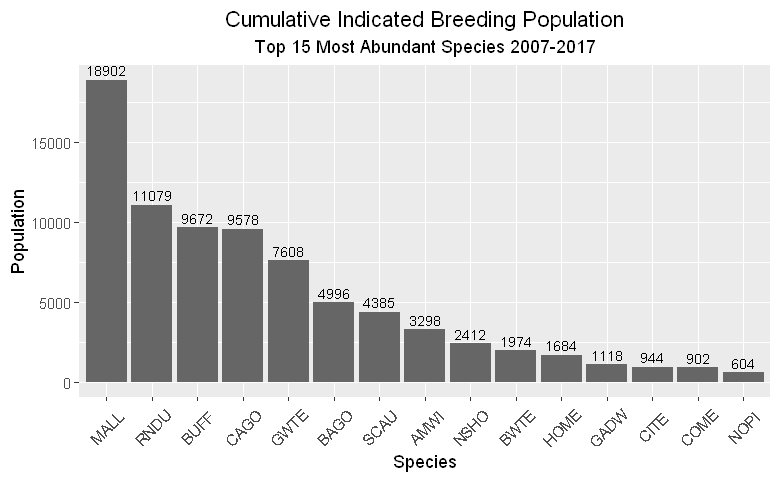

In [33]:
sp <- df %>% group_by(sp_id) %>% summarise(Population = sum(pop)) %>% arrange(desc(Population)) %>% 
    top_n(15)
# sp
p <- ggplot(data = sp, aes(x = reorder(sp_id, -Population), y = Population)) + geom_bar(stat = "identity", 
    fill = "gray40") + ggtitle("Cumulative Indicated Breeding Population", subtitle = "Top 15 Most Abundant Species 2007-2017") + 
    xlab("Species") + geom_text(aes(label = Population), size = 3, hjust = 0.5, vjust = -0.4) + 
    theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5), 
        axis.text.x = element_text(angle = 45, vjust = 0.5))
options(repr.plot.width = 6.5, repr.plot.height = 4)
p

What is the distribution of species within ecosections?

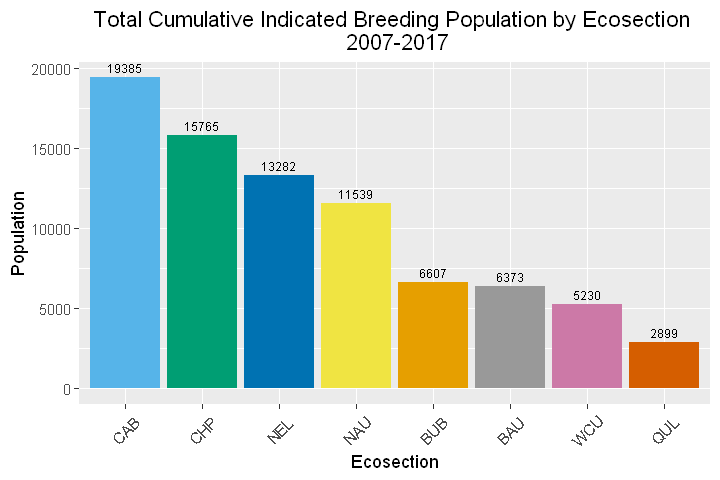

In [35]:
eco_sp <- df %>% group_by(eco) %>% summarise(Population = sum(pop)) %>% arrange(desc(Population))

# Create a custom colour-blind-friendly scale
library(RColorBrewer)
cbp1 <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", 
    "#CC79A7")

names(cbp1) <- levels(eco_sp$eco)
colFill <- scale_fill_manual(names(cbp1), values = cbp1)
colColour <- scale_colour_manual(name = "ECO", names(cbp1), values = cbp1)

g <- ggplot(eco_sp, aes(x = reorder(eco, -Population), y = Population, fill = eco)) + 
    geom_bar(stat = "identity") + ggtitle("Total Cumulative Indicated Breeding Population by Ecosection \n 2007-2017") + 
    xlab("Ecosection") + labs(color = "Ecosection") + colFill + geom_text(aes(label = Population), 
    size = 2.5, hjust = 0.5, vjust = -0.5) + theme(axis.text.x = element_text(angle = 45, 
    vjust = 0.5), plot.title = element_text(hjust = 0.5), legend.position = "none")
options(repr.plot.width = 6, repr.plot.height = 4)
g

The Cariboo Basin (CAB) is clearly a very important Ecosection for breeding waterfowl populations especially when taking the Ecosection area into account as visualized by population density below.

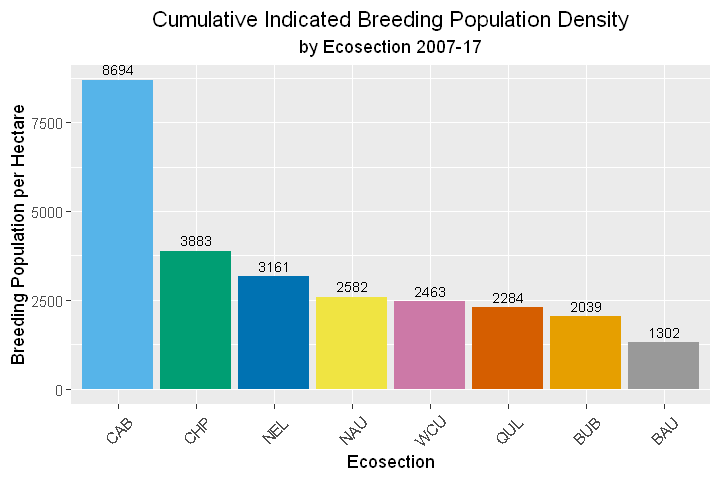

In [37]:
eco_area <- read.csv("eco_transect_area_summary.csv")
eco_p <- merge(eco_sp, eco_area)
eco_p$p_density <- eco_p$Population/eco_p$area_surveyed*10000

g <- ggplot(eco_p, aes(x=reorder(eco, -p_density),y=p_density, fill=eco)) + geom_bar(stat="identity") + 

    ggtitle(label="Cumulative Indicated Breeding Population Density", subtitle="by Ecosection 2007-17") + colFill +
    geom_text(aes(label=round(p_density, digits=0)), size=3, hjust=0.5, vjust=-0.5) +
    xlab("Ecosection") + ylab("Breeding Population per Hectare") + 
    theme(axis.text.x = element_text(angle=45,vjust=.5), 
        plot.title = element_text(hjust=0.5),
        plot.subtitle = element_text(hjust=0.5), 
        legend.position = "none")
options(repr.plot.width=6,repr.plot.height=4)
g


How does the population density vary through time?

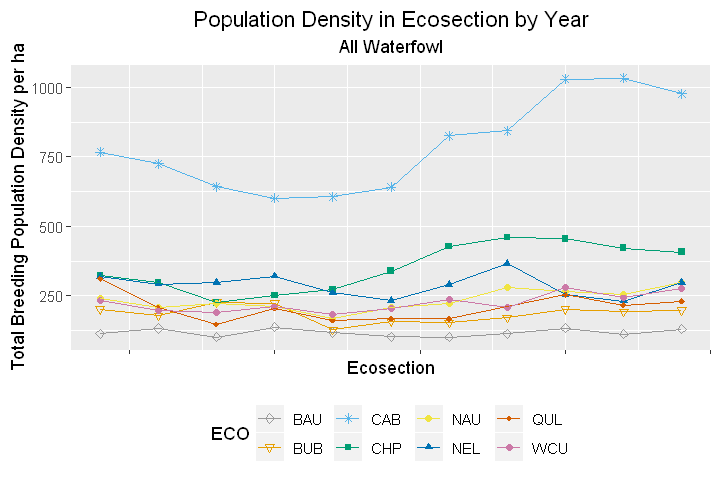

In [38]:
eco_yr <- df %>% group_by(eco, year_) %>% summarise(pop = sum(pop)) %>% left_join(., 
    eco_area, by = "eco") %>% mutate(density = pop/area_surveyed * 10000)

shp1 <- c(5,6,8,15:19)
colShape <- scale_shape_manual(name = "ECO", names(cbp1), values = shp1)

# #Plot the outcome
g <- ggplot(eco_yr, aes(year_, density, colour = eco, shape = eco)) + ggtitle("Population Density in Ecosection by Year", 
    subtitle = "All Waterfowl") + geom_point() + geom_line(size = 0.5) + colShape + 
    colColour + theme(legend.position = "bottom", legend.direction = "horizontal", 
    legend.box = "vertical", axis.text.x = element_blank(), plot.title = element_text(hjust = 0.5), 
    plot.subtitle = element_text(hjust = 0.5)) + xlab("Ecosection") + ylab("Total Breeding Population Density per ha")
options(repr.plot.width = 6, repr.plot.height = 4)
g

Temporal animations can provide a different perspective. Animated lines, dots and bar charts below. I got carried away obviously. 

In [39]:
## 'gganimate' Line chart with dots using 'transition_reveal'
g <- ggplot(eco_yr, aes(year_, density, group = eco, shape = eco, colour = eco)) + labs(title = "Population Density in Ecosection by Year") + 
    geom_point(size = 4) + geom_line(size = 1) + colShape + colColour + theme(legend.position = "bottom", 
    axis.text.x = element_text(angle = 45, vjust = 0.5), plot.title = element_text(hjust = 0.5), 
    plot.subtitle = element_text(hjust = 0.5, size = 17)) + scale_size(guide = FALSE) + 
    xlab("Ecosection") + ylab("Total Breeding Population Density per ha")
g + geom_point((aes(group = seq_along(year_), size = 2))) + transition_reveal(year_) + 
    labs(subtitle = "{frame_along}")

## Dot plot with 'shadow_wake' and 'transition_time'
g <- ggplot(eco_yr, aes(eco, density, size = density, colour = eco)) + geom_point(size = 9) + 
    colColour + ggtitle(label = "Population Density in Ecosection by Year") + theme(legend.position = "bottom", 
    axis.text.x = element_text(angle = 45, vjust = 0.5, size = 9), plot.title = element_text(hjust = 0.5), 
    plot.subtitle = element_text(hjust = 0.5, size = 17)) + xlab("Ecosection") + 
    ylab("Total Breeding Population Density per ha")
g + transition_time(year_) + labs(subtitle = "{frame_time}") + shadow_wake(wake_length = 0.2, 
    alpha = FALSE)

## Bar chart with 'transition_time'
g <- ggplot(eco_yr, aes(eco, density, fill = eco)) + geom_bar(stat = "identity") + 
    colFill + theme(legend.position = "bottom", legend.direction = "horizontal", 
    legend.box = "vertical", axis.text.x = element_text(angle = 45, vjust = 0.5, 
        size = 9), plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5, 
        size = 17)) + xlab("Ecosection") + ylab("Total Breeding Population Density per ha")
g + transition_time(year_) + labs(title = "Population Density in Ecosection by Year", 
    subtitle = "{frame_time}")

![SegmentLocal](popd_eco_yr_line.gif "segment")

![SegmentLocal](popd_eco_yr_point.gif "segment")

![SegmentLocal](popd_eco_yr_bar.gif "segment")

Let's drill down to the species distributions within Ecosections focusing on the top 10 most abundant.

In [45]:
sp_10 <- factor(sp_top_10$sp_id) # Unless factor original 31 levels are retained
sp_10
sp_10 <- tolower(sp_10) 

[1] MALL RNDU BUFF CAGO GWTE BAGO SCAU AMWI NSHO BWTE
Levels: AMWI BAGO BUFF BWTE CAGO GWTE MALL NSHO RNDU SCAU

In [46]:
# Load the processed data with associated environmental variables summarized to grid cell.

library(tidyr)
library(gridExtra)
library(tidyverse)
library(repr) # Plot sizes in Jupyter wrapper for R 
iws_wide <- read.csv("merged_id1_400_years.csv")
# Note processed data have sp codes in lowercase in wide format for model input
iws_long <- gather(iws_wide, sp_id, pop, amwi:ground) 

eco_sp_yr <- iws_long %>%
    group_by(eco, year_,sp_id)%>%
    summarise(Population = sum(pop))%>%
    left_join(., eco_area, by = "eco")%>%
    mutate(density = Population/area_surveyed*10000)%>%
    filter(sp_id %in% sp_10)

head(eco_sp_yr)

eco,year_,sp_id,Population,total_area,area_surveyed,pct_tot_area,pct_area_surveyed,density
<fct>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BAU,2007,amwi,14,1961719,48959.75,0.1831068,0.1848207,2.8594917
BAU,2007,bago,104,1961719,48959.75,0.1831068,0.1848207,21.2419387
BAU,2007,buff,68,1961719,48959.75,0.1831068,0.1848207,13.8889599
BAU,2007,bwte,4,1961719,48959.75,0.1831068,0.1848207,0.8169976
BAU,2007,cago,24,1961719,48959.75,0.1831068,0.1848207,4.9019858
BAU,2007,gwte,52,1961719,48959.75,0.1831068,0.1848207,10.6209693


Visualize and compare distributions of the top most common species

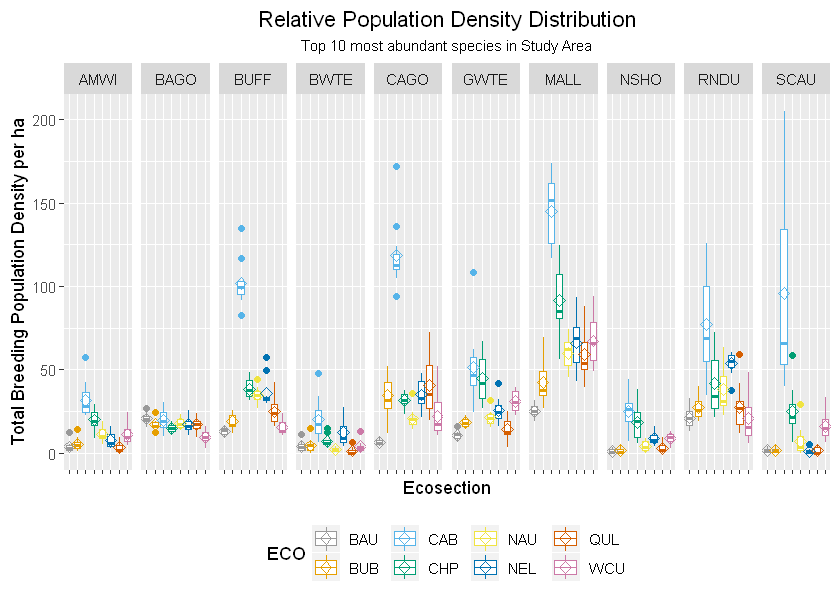

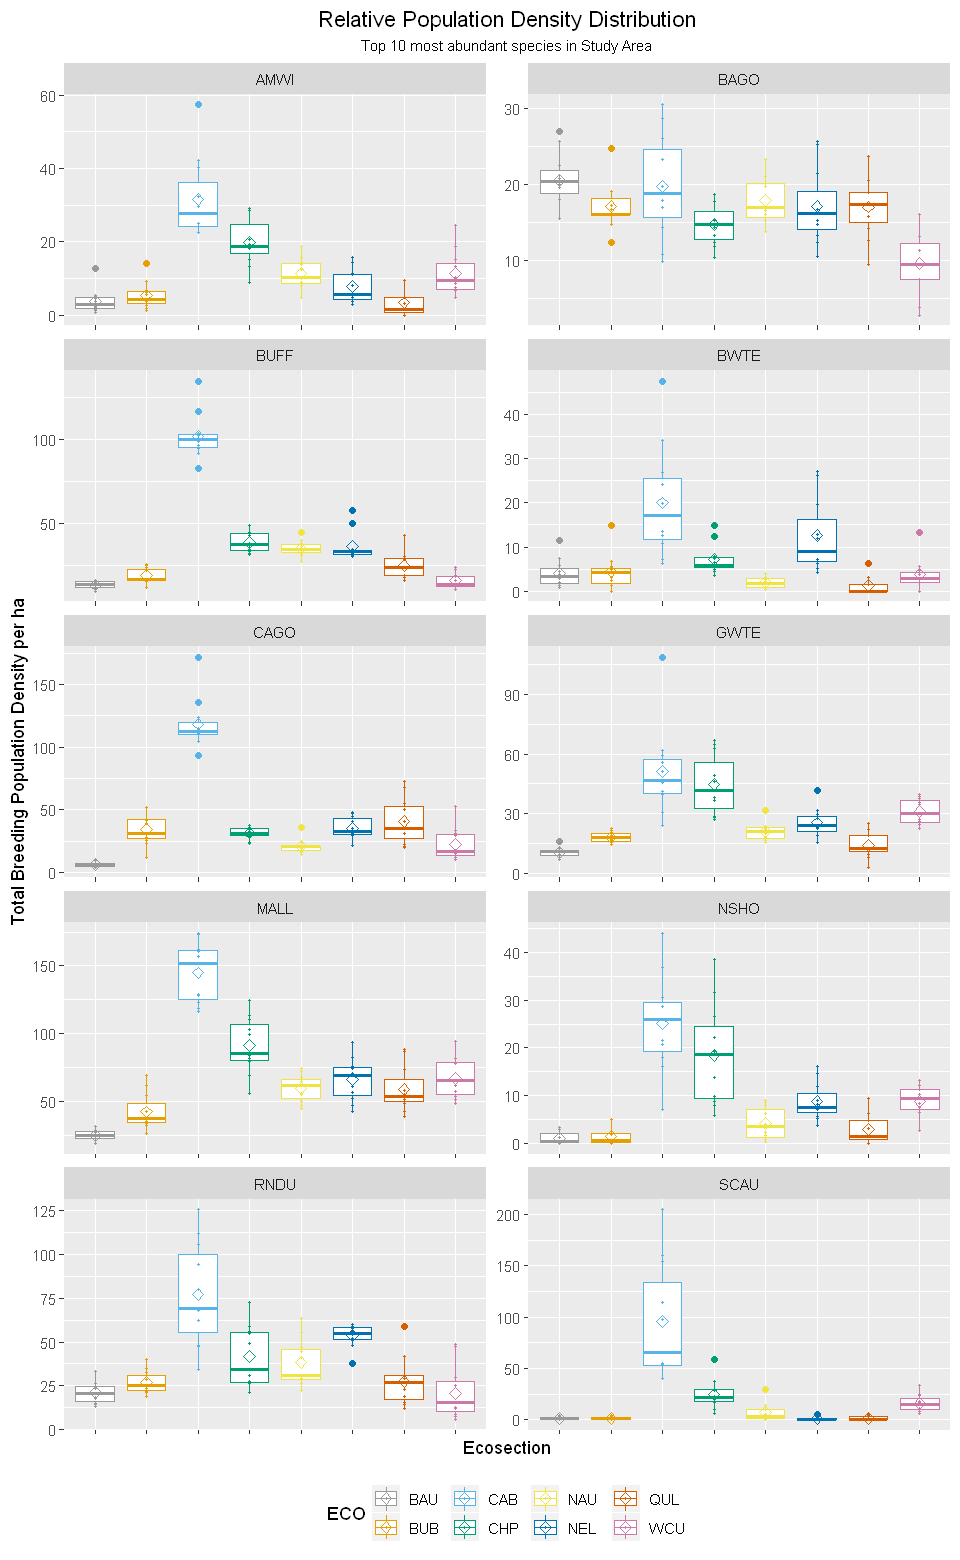

In [47]:
bp <- ggplot(eco_sp_yr, aes(x=eco, y=density, colour=eco)) + 
    geom_boxplot() + colColour + ggtitle(label="Relative Population Density Distribution", subtitle="Top 10 most abundant species in Study Area") +
    theme(legend.position="bottom",legend.direction = "horizontal", legend.box="vertical", 
            axis.text.x = element_blank(), 
              plot.title = element_text(hjust = 0.5),
            plot.subtitle = element_text(hjust=0.5, size=9)) + 
    ylab("Total Breeding Population Density per ha") + xlab("Ecosection") +
    stat_summary(fun.y=mean, geom="point", shape=5, size=2)# Add means

options(repr.plot.width=7,repr.plot.height=5)
bp + facet_wrap(. ~ toupper(sp_id), ncol=10)

# Display with dynamic scale ranges
options(repr.plot.width=8,repr.plot.height=13)
bp + facet_wrap(. ~ toupper(sp_id), ncol=2, scales="free") + geom_point(size=0.4)



`geom_smooth()` using method = 'loess' and formula 'y ~ x'


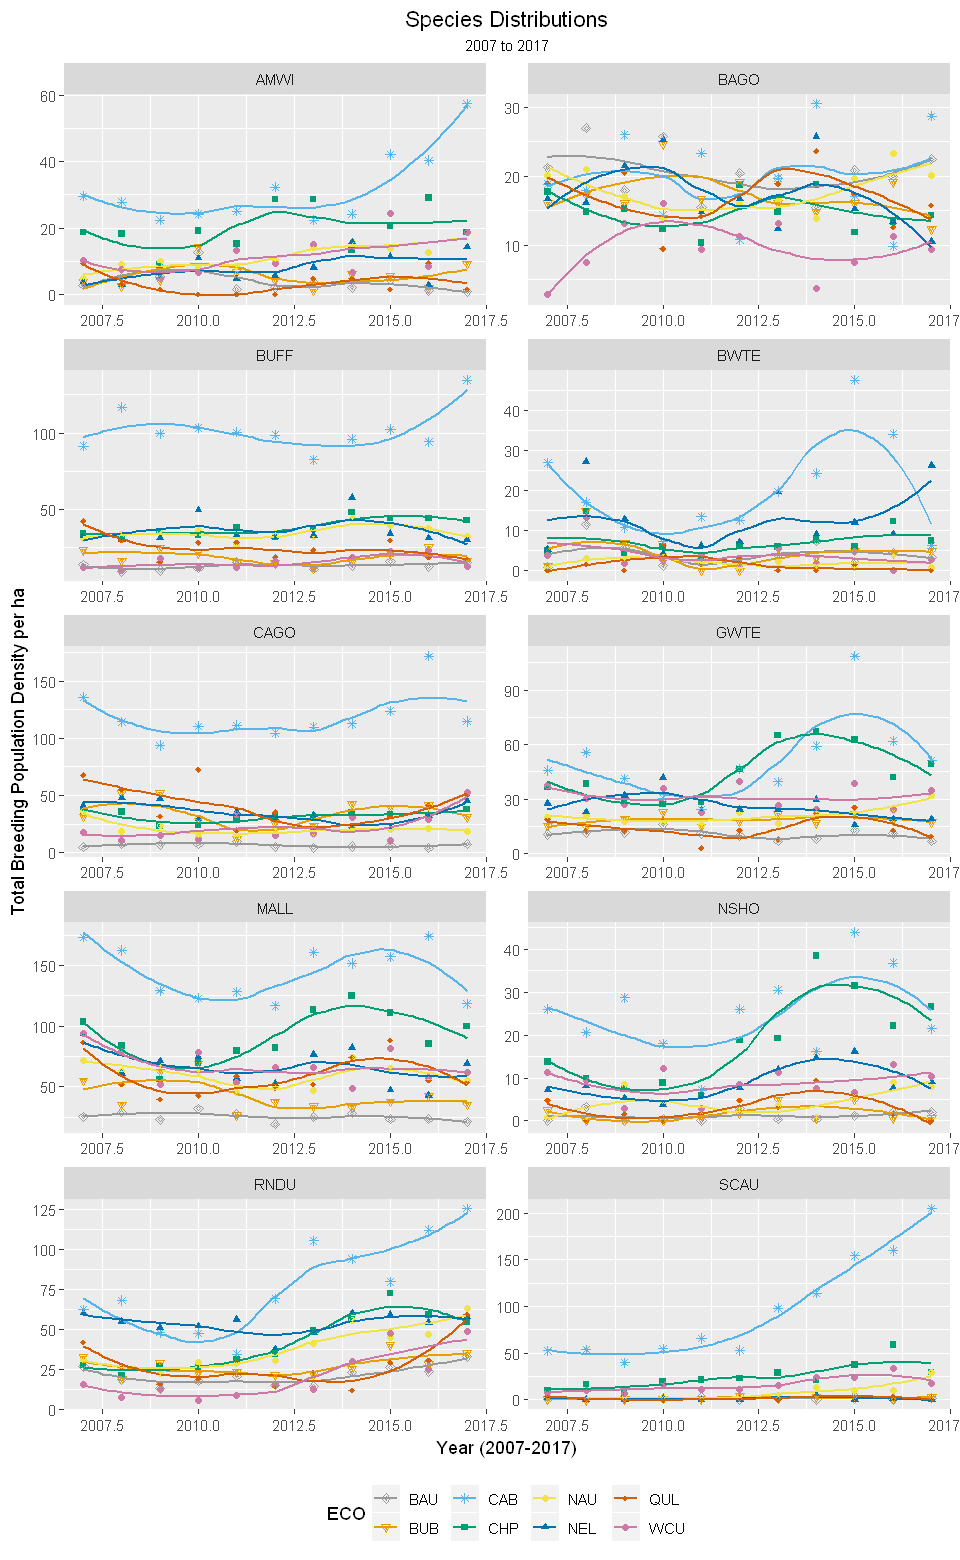

In [49]:
sp_yr <- ggplot(eco_sp_yr, aes(x = year_, y = density, colour = eco, shape = eco)) + 
    geom_point() + geom_smooth(method = "auto", se = FALSE, size = 0.7) + colShape + 
    colColour + ggtitle(label = "Species Distributions", subtitle = "2007 to 2017") + 
    theme(legend.position = "bottom", legend.direction = "horizontal", legend.box = "vertical", 
        plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5, 
            size = 9)) + ylab("Total Breeding Population Density per ha") + xlab("Year (2007-2017)")

# Display with dynamic scale ranges
options(repr.plot.width = 8, repr.plot.height = 13)
sp_yr + facet_wrap(. ~ toupper(sp_id), ncol = 2, scales = "free") + geom_point(size = 0.4)

Table view of the Top 10 most abundant species within each Ecosection

In [50]:
# Get the top 5 most common species in each ecosection
# sp_id contains species guilds as well as single species
sp_long <- iws_wide[,1:grep("wodu", colnames(iws_wide))] %>%
    gather(sp_id, pop, amwi:wodu) %>%
    group_by(eco, sp_id)%>%
    summarise(pop=sum(pop))%>%
    group_by(eco)%>%
    mutate(ranks = dense_rank(desc(pop)))%>%
    filter(ranks<=10)%>%
    select(-c(pop))%>%
    spread(eco, sp_id) %>%
    group_by(ranks)

print("Top 10 Cumulative Most Abundant Species by Ecosection")
# function to convert lowercase to upper
data.frame(lapply(sp_long, function(v) {
  if (is.character(v)) return(toupper(v))
  else return(v)
}))



[1] "Top 10 Cumulative Most Abundant Species by Ecosection"


ranks,BAU,BUB,CAB,CHP,NAU,NEL,QUL,WCU
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,MALL,MALL,MALL,MALL,MALL,MALL,MALL,MALL
2,RNDU,CAGO,CAGO,GWTE,RNDU,RNDU,CAGO,GWTE
3,BAGO,RNDU,BUFF,RNDU,BUFF,BUFF,RNDU,CAGO
4,BUFF,BUFF,SCAU,BUFF,GWTE,CAGO,BUFF,RNDU
5,GWTE,GWTE,RNDU,CAGO,CAGO,GWTE,BAGO,SCAU
6,CAGO,BAGO,GWTE,SCAU,BAGO,BAGO,GWTE,BUFF
7,COME,AMWI,GADW,AMWI,AMWI,BWTE,HOME,AMWI
8,HOME,HOME,AMWI,NSHO,HOME,HOME,AMWI,BAGO
9,BWTE,COME,NSHO,BAGO,SCAU,NSHO,NSHO,NSHO


In [ ]:
# Animation of facet_grid scatterplot - too dizzying really.

g <- ggplot(eco_sp_yr, (aes(x = eco ,y = density, size = density, colour=eco))) +
    ggtitle("Population Density in Ecosection by Year") +
      geom_point() + colColour + theme(legend.position="bottom",legend.direction = "horizontal", legend.box="vertical", 
                                  axis.text.x = element_blank(), 
                                    plot.title = element_text(hjust = 0.5),
                                    plot.subtitle = element_text(hjust=0.5, size=17))+ 
       xlab("Ecosection") + ylab("Total Breeding Population Density per ha")


g + facet_wrap(. ~ toupper(sp_id), ncol=3) + transition_time(year_) + labs(subtitle = '{frame_time}')

## Evaluation of Modelling Approaches and Data Inputs

Points of consideration for the modelling framework, data inputs, and their interactions

#### Data Properties
* Accuracy and uncertainty
* Data acquisition and availability
* Logical consistency and timeliness
* Scale, extent and resolution 
* Direct vs Indirect 
* Mechanisitic vs correlated 
* Ecological and physiological

####  Model Properties
* Predictive vs Explanatory (Random Forest and Regression-based approaches)
* Intepretation - scale of analyses and applications

<img src="modeling_guisan.png" alt="Drawing"/>


## Waterfowl Survey Observation data
##### Weaknesses
* Positional uncertainty of observation data
* Inconsistency of survey methods - technological change
* Survey conditions (climate and weather-dependent, pilot experience)
* Relative coverage - 400m wide strip transects spaced 10 miles apart (~2.5% study area)
* Inconsistent with methods of North American Breeding Waterfowl Habitat and Population Survey (1955-present)

##### Strengths
* Consistent and highly experienced observers 
* Continuous, annual basis since 2006 
* Large database ~ 30,000+ 
* Large extent ~ 10,000,000+ ha (~40,000+ sq miles)


<img src="overview_observations.png" alt="Drawing" style="width: 400px;"/>

## Explanatory Predictor Candidates
#### Climate
* Growing Degree Days - Primary Productivity
* Precipitation as Snow - Hydrology is driven by snowpack 
* Spring Temperature - Timing of freshet
* Heat Moisture Index - (MAT+10)/(MAP/1000) 

#### Landscape
* Topography - aspect, slope, elevation
* Landcover - readily available interpreted data product (CEC 2010)
* Disturbance - roads atlas, fire database, Mountain Pine Beetle 
* Wetland habitat - lakes, rivers, wetlands
    * smaller wetlands <10 ha ≈ increased productivity
    * data creation driven by forestry industry
    
#### Land management
* Agricultural Land Reserve
* Protected Areas
* Tenure

<sub>See 'data_dictionary.xlsx'</sub>

<< PLACEHOLDER PREDICTOR SURFACES 

## Random Forest - Overview of steps
1. Random forest approach selected for predictive power
2. Tool selection
    * 'cforest' party package - conditional inference trees
    * 'randomForest' - favours continuous variables and variables with many categories
    * 'Forest-based Classification and Regression' ArcGIS Pro v2.2+
3. Variable selection
4. Data processing
5. Model evaluation
     * Model stability
     * Model accuracy

<a href=https://core.ac.uk/download/pdf/12170130.pdf><div style="text-align: right"> <font size = -1>Strobl et al, 2009</font> </div></a>  

![image](random_forest_diagram_complete_vankar_jaganath_cc.png) 
<div style="text-align: right"> <sub> cc Vankar Jaganath <sub> </div>

### Variable Selection 
##### Ecological considerations and issues
* Climate normals vs mean vs timeliness - response lag
* Species breeding philopatry
* Density-dependence and interspecific competition
* Wintering conditions
##### Addressing correlation, collinearity and variance inflation
* High degree of correlation in climate and ecology 
* Imbalanced classes of predictor variables
* Spatial variability
* *Scale



#### Example collinearity - Climate
* Correlation thresholds:
    * < 0.7 (Green, 1979) 
    * < 0.8 (Menard, 2002)
* Multicollinearity - correlation between 3+ variables even when pair-wise correlation is absent
    * VIF threshold < 5  
    * critical threshold 5-10 (Guisan et al, 2017)


[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

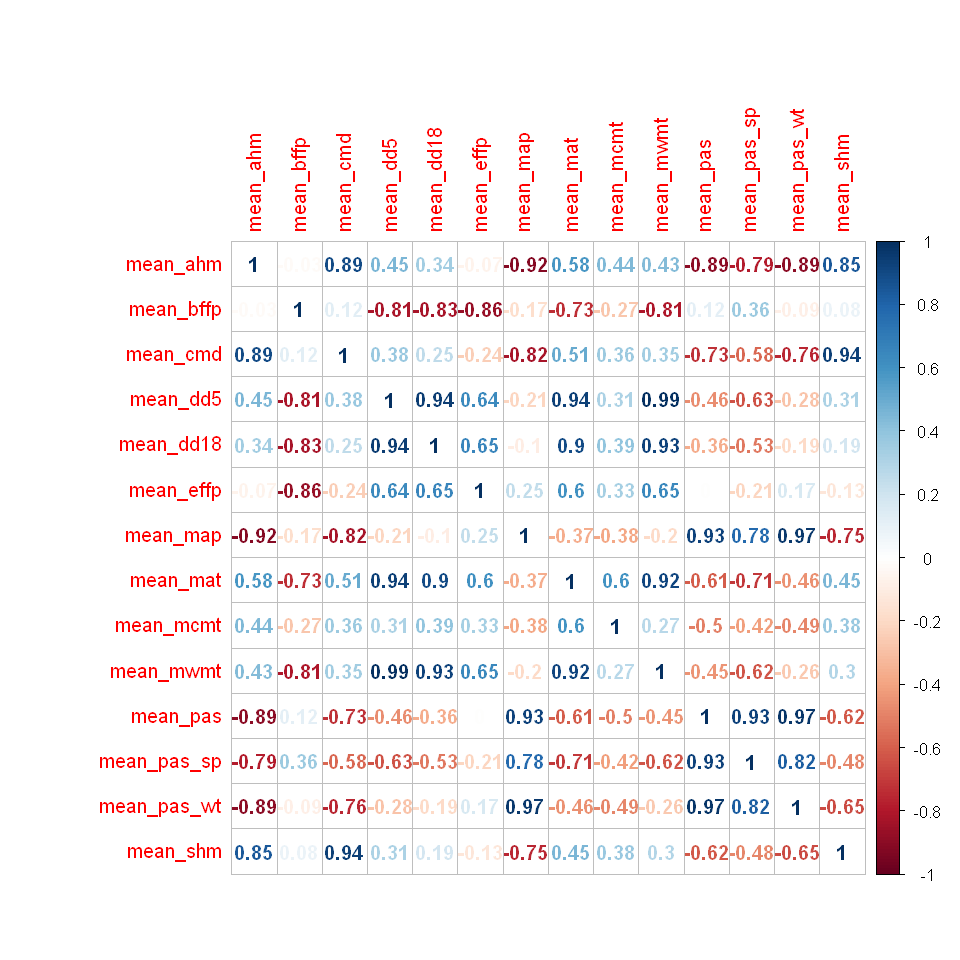

In [8]:
## Address Correlations, Multicollinearity and VIF
Packages <- c('Hmisc', 'corrplot', 'car')
lapply(Packages, require, character.only=TRUE)
iws_wide <- read.csv("id1_400_years.csv")
# Example climate variable selection
# pairwise correlations with 'rcorr'
clim_var <- iws_wide[,grep("mean_ahm", colnames(iws_wide)):grep("mean_shm", colnames(iws_wide))]
# Set plot size
options(repr.plot.width=8, repr.plot.height=8)
#Check correlations
corr <- rcorr(as.matrix(clim_var))
corrplot(corr$r, method='number', number.cex= 10/ncol(df))


Filter candidates identifying key drivers: snowpack, growing degree days (DD5), moisture index

'data.frame':	180950 obs. of  3 variables:
 $ mean_pas_wt: num  196 196 196 196 196 ...
 $ mean_shm   : num  88.3 88.3 88.3 88.3 88.3 ...
 $ mean_dd5   : num  880 880 880 880 880 ...


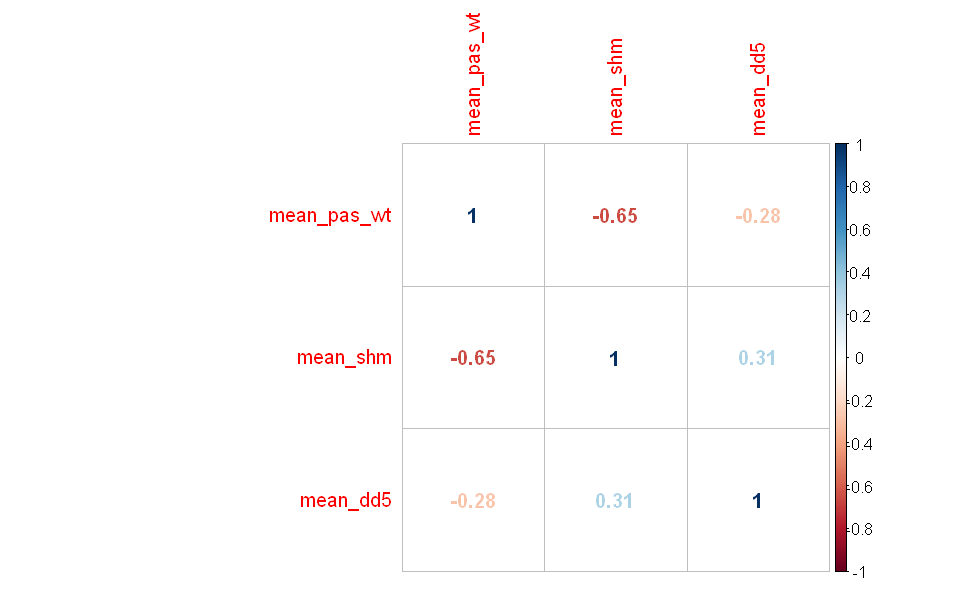

In [34]:
library(dplyr)
# Subset
# grep("mean_shm", colnames(iws_wide))
# grep("mean_pas_wt", colnames(iws_wide))
# grep("mean_dd5", colnames(iws_wide))

clim_var_1 <- iws_wide[,c(76, 77, 67)]

# Set plot size
options(repr.plot.width=8, repr.plot.height=5)

# Check correlations
# Set plot size
corr <- rcorr(as.matrix(clim_var_1))
corrplot(corr$r, method='number', number.cex= 10/ncol(df))
str(clim_var_1)


 Named num [1:3] 1.77 1.81 1.11
 - attr(*, "names")= chr [1:3] "mean_pas_wt" "mean_shm" "mean_dd5"


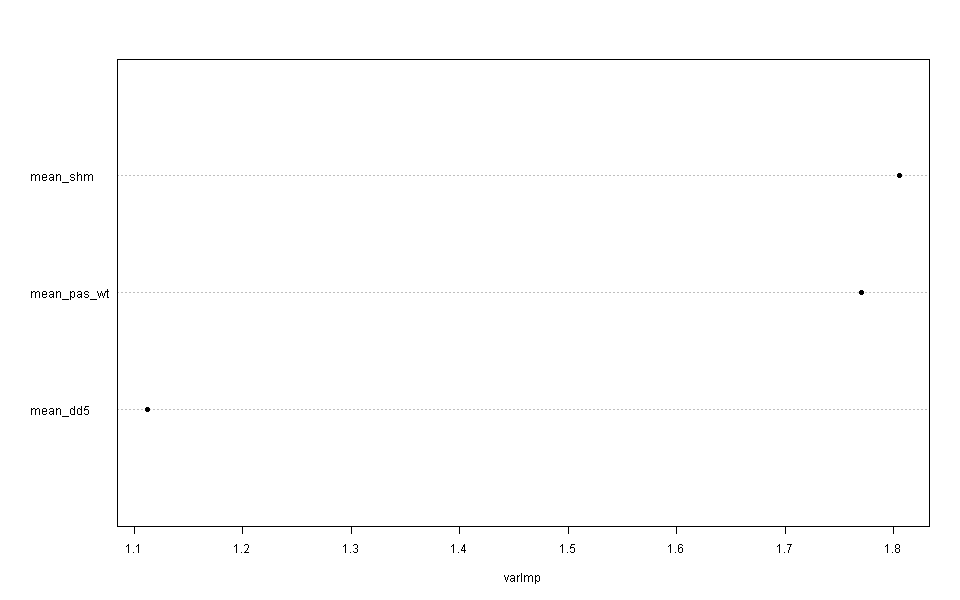

In [35]:
# Assess multicollinearity
library(usdm)

v <- vif(clim_var_1)
vm <- v$VIF
names(vm) <- v$Variables
str(vm)
dotchart(vm[order(vm)], cex = 0.6, pch = 19,
         gcolor = "#999999",
         xlab = "varImp")

### Random Forest Model Evaluation

##### Model Stability - Variable Important Measures (varimp)
* Subset data into training, validate and test subsets (70, 30, 30%)
* Run models with different seeds
* Compare ranks of varimp ('SuperRanker') 
* Evaluate 

![image](varimp_multi.png)


<sub>Toggle cell below for model evalution code - note raw data not included in notebook<sub>

In [ ]:
# Sequential rank agreement methods for comparison of ranked lists
# https://github.com/tagteam/SuperRanker

fgcRequire <- function(pkg) {
  if(pkg %in% rownames(installed.packages()) == FALSE) {
    install.packages(pkg)
  }
}

fgcRequire("devtools")
library(devtools)

install_github('TagTeam/SuperRanker')
library(SuperRanker)  # For the SuperRanker package

fgcRequire("dplyr")
library(dplyr)

# cforest data model - predict type = 'response'
wdA <- "../results-seed-47"
wdB <- "../results-seed-742938"
#wdC <- "../results-seed-42"

## ranking of named predictor ranks
# rank1 <- v1 %>%
#     mutate(ranks = dense_rank(desc(vi)))
# rank2 <- v2 %>%
#     mutate(ranks = dense_rank(desc(vi)))
# compare <- merge(rank, rank2, by = "X")
# ordered <- compare %>%
#    arrange(ranks.x)
#ordered$dif <- abs(ordered$ranks.x - ordered$ranks.y)
# ordered

af <- list.files(wdA, "*.csv$")
bf <- list.files(wdB, "*.csv$")

if (length(intersect(af,bf)) != length(bf)) { 
  print("unpaired input sets")
  return()
}

f <-  af[1] # DEBUG
lapply(af, function(f) {
  setwd(wdA)
  a <- read.csv(f)
  sa <- order(a$vi, decreasing = TRUE)
  
  setwd(wdB)
  b <- read.csv(f)
  sb <- order(b$vi, decreasing = TRUE)

  i <- cbind(sa,sb)
  mlist <- matrix(i,ncol=2)
  #rank <- overlap(mlist)
  rank <- smooth_sra(mlist)
  
  print(paste("Result:", f))
  print(rank)
  ul <- cbind(rank$lower,rank$upper)
  
  apply(ul, 1, function(r) {
    if (r[1] != r[2]) {   
    }
   }
  })    
})

names(rank)

### Accuracy Assessment

### Model Predictions

## Regression-based  - Overview of steps
1. Generalized Linear Mixed Models approach
    * Allows for variable response distributions - Poisson, Gamma, etc
    * Zero-inflation (16ha spatial and yearly scale ~ 92% records recorded 0)
    * Fixed and random effects
    * Flexible, efficient
2. Tool selection
    * lme4, glmmTMB
3. Variable selection
4. Data processing
    * Standardization 
5. Model evaluation
     * Model stability
     * Model accuracy

  


### Variable Selection methods???

## Tools and technologies

* Jupyter notebook - computational notebook 
* tidyverse - family of R packages sharing a common syntax (dplyr, ggplot2, purr, tidyr, etc) 
* rpy2 - interface to R from within Python - switch between R and Python with R magics 
* R-ArcGIS Bridge - interface ArcGIS and R (R v 3.2.2+, Python Script Toolbox
* R-markdown
* Python Toolbox -  